In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('musteriler.csv')
df.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cinsiyet = le.fit_transform(df.Cinsiyet.values)
cinsiyet = pd.DataFrame(cinsiyet)
X = pd.concat([cinsiyet,df.iloc[:,2:]], axis=1)
X

,0,Yas,Hacim,Maas
0,1,60,69900,6325
1,1,30,79000,5200
2,0,52,85500,7825
3,0,57,17100,8375
4,0,55,5500,5450
...,...,...,...,...
195,0,22,96600,7900
196,0,39,83700,7675
197,1,25,34000,4000
198,1,30,42000,5500


In [50]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++')
km.fit(X.values)
km.cluster_centers_

array([[4.13043478e-01, 5.77391304e+01, 1.04386957e+05, 7.28913043e+03],
       [4.58823529e-01, 4.14235294e+01, 2.20694118e+04, 5.32088235e+03],
       [4.34782609e-01, 4.42608696e+01, 5.86434783e+04, 5.84492754e+03]])

In [52]:
results = []
for i in range(1,10):
    km2 = KMeans(n_clusters=i, init='k-means++', random_state=1)
    km2.fit(X.values)
    results.append(km2.inertia_)
results

[242389963686.35,
 69083341747.17188,
 37362918405.03517,
 19665092452.90033,
 12911405668.936764,
 8631986053.890331,
 6682839103.319252,
 5265140994.498014,
 4267119490.248378]

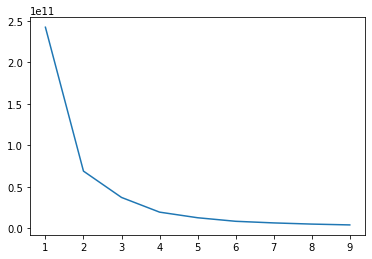

In [54]:
plt.plot(range(1,10),results)